In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

main = pd.read_csv('responses2.csv')
main.head()

,Unnamed: 0,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,Male,22,Senior,College of Engineering,16,31-40,7,8,0,...,6,1,1,2,1,2,2,1,1,1
1,1,Male,21,Junior,College of Engineering,17,<10,4,6,0,...,8,3,2,3,3,2,1,1,1,3
2,2,Male,21,Junior,College of Engineering,12,10-20,8,8,Club,...,8,1,2,2,3,1,1,1,0,2
3,3,Prefer not to say,20,Senior,College of Engineering,12,21-30,8,5,Job,...,7,1,0,1,1,2,2,0,1,2
4,4,Male,21,Junior,College of Engineering,17,41-50,4,8,Both,...,9,1,2,3,3,3,3,3,3,3


In [5]:
from sklearn.model_selection import train_test_split

target_column = 'Overall_Stress' 
X = main.drop(columns=[target_column]) 
y = main[target_column]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (50, 26), X_test shape: (13, 26)
y_train shape: (50,), y_test shape: (13,)


In [6]:
main.loc[main['Sex'] == 'Male', 'Sex'] = 0
main.loc[main['Sex'] == 'Female', 'Sex'] = 1
main.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,Senior,College of Engineering,16,31-40,7,8,0,0,...,6,1,1,2,1,2,2,1,1,1
1,0,21,Junior,College of Engineering,17,<10,4,6,0,0,...,8,3,2,3,3,2,1,1,1,3
2,0,21,Junior,College of Engineering,12,10-20,8,8,Club,1-5,...,8,1,2,2,3,1,1,1,0,2
3,Prefer not to say,20,Senior,College of Engineering,12,21-30,8,5,Job,16-20,...,7,1,0,1,1,2,2,0,1,2
4,0,21,Junior,College of Engineering,17,41-50,4,8,Both,11-15,...,9,1,2,3,3,3,3,3,3,3


In [7]:
main['Major'].value_counts()

Major
College of Letters and Science                        28
College of Engineering                                17
College of Biological Sciences                        12
College of Agricultural and Environmental Sciences     4
Double Major                                           2
Name: count, dtype: int64

In [10]:
main.loc[main['Major'] == 'College of Letters and Science', 'Major'] = 0
main.loc[main['Major'] == 'College of Engineering', 'Major'] = 1
main.loc[main['Major'] == 'College of Biological Sciences', 'Major'] = 2
main.loc[main['Major'] == 'College of Agricultural and Environmental Sciences', 'Major'] = 3
main.loc[main['Major'] == 'Double Major', 'Major'] = 4
main.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,Senior,1,16,31-40,7,8,0,0,...,6,1,1,2,1,2,2,1,1,1
1,0,21,Junior,1,17,<10,4,6,0,0,...,8,3,2,3,3,2,1,1,1,3
2,0,21,Junior,1,12,10-20,8,8,Club,1-5,...,8,1,2,2,3,1,1,1,0,2
3,Prefer not to say,20,Senior,1,12,21-30,8,5,Job,16-20,...,7,1,0,1,1,2,2,0,1,2
4,0,21,Junior,1,17,41-50,4,8,Both,11-15,...,9,1,2,3,3,3,3,3,3,3


In [22]:
main['Sex'].value_counts()

Sex
1                    35
0                    26
Prefer not to say     2
Name: count, dtype: int64

In [23]:
main.loc[main['Sex'] == 'Prefer not to say', 'Sex'] = 2
main.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,0,1,16,31-40,7,8,2,0,...,6,1,1,2,1,2,2,1,1,1
1,0,21,1,1,17,<10,4,6,2,0,...,8,3,2,3,3,2,1,1,1,3
2,0,21,1,1,12,10-20,8,8,1,1-5,...,8,1,2,2,3,1,1,1,0,2
3,2,20,0,1,12,21-30,8,5,0,16-20,...,7,1,0,1,1,2,2,0,1,2
4,0,21,1,1,17,41-50,4,8,3,11-15,...,9,1,2,3,3,3,3,3,3,3


In [11]:
main['Major'].value_counts()

Major
0    28
1    17
2    12
3     4
4     2
Name: count, dtype: int64

In [8]:
main['Year'].value_counts()

Year
Senior              38
Junior              21
Sophomore            2
Freshman             1
Graduate Student     1
Name: count, dtype: int64

In [12]:
main.loc[main['Year'] == 'Senior', 'Year'] = 0
main.loc[main['Year'] == 'Junior', 'Year'] = 1
main.loc[main['Year'] == 'Sophomore', 'Year'] = 2
main.loc[main['Year'] == 'Freshman', 'Year'] = 3
main.loc[main['Year'] == 'Graduate Student', 'Year'] = 4
main.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,0,1,16,31-40,7,8,0,0,...,6,1,1,2,1,2,2,1,1,1
1,0,21,1,1,17,<10,4,6,0,0,...,8,3,2,3,3,2,1,1,1,3
2,0,21,1,1,12,10-20,8,8,Club,1-5,...,8,1,2,2,3,1,1,1,0,2
3,Prefer not to say,20,0,1,12,21-30,8,5,Job,16-20,...,7,1,0,1,1,2,2,0,1,2
4,0,21,1,1,17,41-50,4,8,Both,11-15,...,9,1,2,3,3,3,3,3,3,3


In [13]:
main['Year'].value_counts()

Year
0    38
1    21
2     2
3     1
4     1
Name: count, dtype: int64

In [9]:
main['Units'].value_counts()

Units
12    20
16    15
17     6
13     6
14     5
18     3
22     2
19     2
8      1
20     1
27     1
15     1
Name: count, dtype: int64

In [14]:
main['Academic_Hours'].value_counts()

Academic_Hours
10-20    20
21-30    19
31-40    10
<10       5
41-50     5
>60       4
Name: count, dtype: int64

In [27]:
main.loc[main['Academic_Hours'] == '10-20', 'Academic_Hours'] = 0
main.loc[main['Academic_Hours'] == '21-30', 'Academic_Hours'] = 1
main.loc[main['Academic_Hours'] == '31-40', 'Academic_Hours'] = 2
main.loc[main['Academic_Hours'] == '<10', 'Academic_Hours'] = 3
main.loc[main['Academic_Hours'] == '41-50', 'Academic_Hours'] = 4
main.loc[main['Academic_Hours'] == '>60', 'Academic_Hours'] = 5
main.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,0,1,16,2,7,8,2,0,...,6,1,1,2,1,2,2,1,1,1
1,0,21,1,1,17,3,4,6,2,0,...,8,3,2,3,3,2,1,1,1,3
2,0,21,1,1,12,0,8,8,1,1-5,...,8,1,2,2,3,1,1,1,0,2
3,2,20,0,1,12,1,8,5,0,16-20,...,7,1,0,1,1,2,2,0,1,2
4,0,21,1,1,17,4,4,8,3,11-15,...,9,1,2,3,3,3,3,3,3,3


In [28]:
main['Position'].value_counts()

Position
0    23
1    14
2    13
3    13
Name: count, dtype: int64

In [29]:
main.loc[main['Position'] == 'Job', 'Position'] = 0
main.loc[main['Position'] == 'Club', 'Position'] = 1
main.loc[main['Position'] == '0', 'Position'] = 2
main.loc[main['Position'] == 'Both', 'Position'] = 3
main.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,0,1,16,2,7,8,2,0,...,6,1,1,2,1,2,2,1,1,1
1,0,21,1,1,17,3,4,6,2,0,...,8,3,2,3,3,2,1,1,1,3
2,0,21,1,1,12,0,8,8,1,1-5,...,8,1,2,2,3,1,1,1,0,2
3,2,20,0,1,12,1,8,5,0,16-20,...,7,1,0,1,1,2,2,0,1,2
4,0,21,1,1,17,4,4,8,3,11-15,...,9,1,2,3,3,3,3,3,3,3


In [30]:
main['Position'].value_counts()

Position
0    23
1    14
2    13
3    13
Name: count, dtype: int64

In [32]:
main['Job_Club_Hours'].value_counts()

Job_Club_Hours
6-10     16
1-5      13
0        12
16-20    10
11-15     7
20+       5
Name: count, dtype: int64

In [40]:
main.loc[main['Job_Club_Hours'] == '6-10', 'Job_Club_Hours'] = 0
main.loc[main['Job_Club_Hours'] == '1-5', 'Job_Club_Hours'] = 1
main.loc[main['Job_Club_Hours'] == '0', 'Job_Club_Hours'] = 2
main.loc[main['Job_Club_Hours'] == '16-20', 'Job_Club_Hours'] = 3
main.loc[main['Job_Club_Hours'] == '11-15', 'Job_Club_Hours'] = 4
main.loc[main['Job_Club_Hours'] == '20+', 'Job_Club_Hours'] = 5
main.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,0,1,16,2,7,8,2,2,...,6,1,1,2,1,2,2,1,1,1
1,0,21,1,1,17,3,4,6,2,2,...,8,3,2,3,3,2,1,1,1,3
2,0,21,1,1,12,0,8,8,1,1,...,8,1,2,2,3,1,1,1,0,2
3,2,20,0,1,12,1,8,5,0,3,...,7,1,0,1,1,2,2,0,1,2
4,0,21,1,1,17,4,4,8,3,4,...,9,1,2,3,3,3,3,3,3,3


In [41]:
main['Job_Club_Hours'].value_counts()

Job_Club_Hours
0    16
1    13
2    12
3    10
4     7
5     5
Name: count, dtype: int64

In [42]:
main.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,0,1,16,2,7,8,2,2,...,6,1,1,2,1,2,2,1,1,1
1,0,21,1,1,17,3,4,6,2,2,...,8,3,2,3,3,2,1,1,1,3
2,0,21,1,1,12,0,8,8,1,1,...,8,1,2,2,3,1,1,1,0,2
3,2,20,0,1,12,1,8,5,0,3,...,7,1,0,1,1,2,2,0,1,2
4,0,21,1,1,17,4,4,8,3,4,...,9,1,2,3,3,3,3,3,3,3


In [45]:
main['Socializing_Hours'].value_counts()

Socializing_Hours
6-10     24
1-5      23
11-15     6
0         4
16-20     4
25-30     2
Name: count, dtype: int64

In [46]:
main.loc[main['Socializing_Hours'] == '6-10', 'Socializing_Hours'] = 0
main.loc[main['Socializing_Hours'] == '1-5', 'Socializing_Hours'] = 1
main.loc[main['Socializing_Hours'] == '11-15', 'Socializing_Hours'] = 2
main.loc[main['Socializing_Hours'] == '0', 'Socializing_Hours'] = 3
main.loc[main['Socializing_Hours'] == '16-20', 'Socializing_Hours'] = 4
main.loc[main['Socializing_Hours'] == '25-30', 'Socializing_Hours'] = 5
main.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,0,1,16,2,7,8,2,2,...,6,1,1,2,1,2,2,1,1,1
1,0,21,1,1,17,3,4,6,2,2,...,8,3,2,3,3,2,1,1,1,3
2,0,21,1,1,12,0,8,8,1,1,...,8,1,2,2,3,1,1,1,0,2
3,2,20,0,1,12,1,8,5,0,3,...,7,1,0,1,1,2,2,0,1,2
4,0,21,1,1,17,4,4,8,3,4,...,9,1,2,3,3,3,3,3,3,3


In [47]:
main['Socializing_Hours'].value_counts()

Socializing_Hours
0    24
1    23
2     6
3     4
4     4
5     2
Name: count, dtype: int64

In [48]:
main.isnull().sum()
main = main.dropna()

main_data = main[['Sex', 'Age', 'Year', 'Major',
       'Units', 'Academic_Hours', 'Academic_Satisfication',
       'Academic_Stress', 'Position',
       'Job_Club_Hours', 'Job_Club_Satisfaction', 'Job_Club_Stress',
       'Sleep_Hours', 'Active_Level', 'Diet_Level', 'Socializing_Hours', 'Financial_Presssure', 
        'Overall_Stress', 'Anxiety_freq', 'Excitement_freq', 'Stress_freq', 'Tiredness_Fatigue_freq', 
        'Unmotived_freq', 'Meaningless_freq', 'Helpless_freq', 'Lonely_freq', 'Overwhelmed_freq']]
main_data.head()

,Sex,Age,Year,Major,Units,Academic_Hours,Academic_Satisfication,Academic_Stress,Position,Job_Club_Hours,...,Overall_Stress,Anxiety_freq,Excitement_freq,Stress_freq,Tiredness_Fatigue_freq,Unmotived_freq,Meaningless_freq,Helpless_freq,Lonely_freq,Overwhelmed_freq
0,0,22,0,1,16,2,7,8,2,2,...,6,1,1,2,1,2,2,1,1,1
1,0,21,1,1,17,3,4,6,2,2,...,8,3,2,3,3,2,1,1,1,3
2,0,21,1,1,12,0,8,8,1,1,...,8,1,2,2,3,1,1,1,0,2
3,2,20,0,1,12,1,8,5,0,3,...,7,1,0,1,1,2,2,0,1,2
4,0,21,1,1,17,4,4,8,3,4,...,9,1,2,3,3,3,3,3,3,3


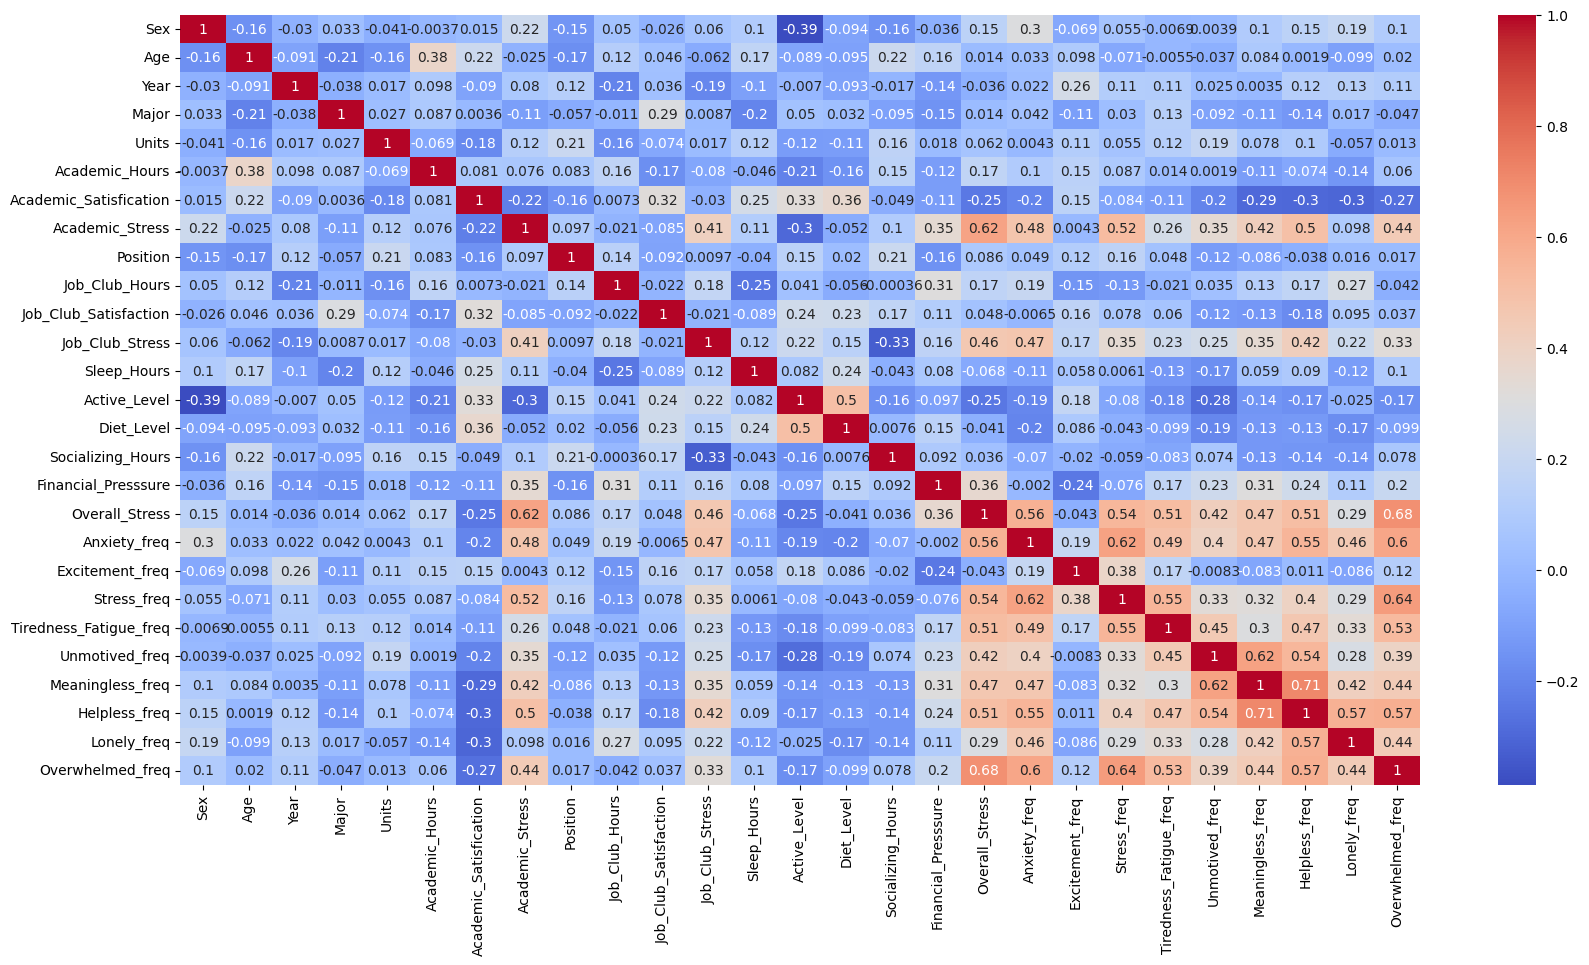

In [49]:
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='coolwarm')
plt.show()